<a href="https://colab.research.google.com/github/duper203/upstage_cookbook/blob/main/DocParse_2_excel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Upstage DocParse #2] RAG with Excel Spreadsheet using DocParse
This cookbook will show you how Upstage DocParse retrieves data from Excel Spreadsheet.

We are using the following stack:
- Excel Extract:  Upstage DocParse
- Embeddings : Upstage Embedding model
- VectorStore : LlamaIndex vectorstore
- Generation : Upstage Solar

## This will be the Excel Spreadsheet we will be using for this cookbook:

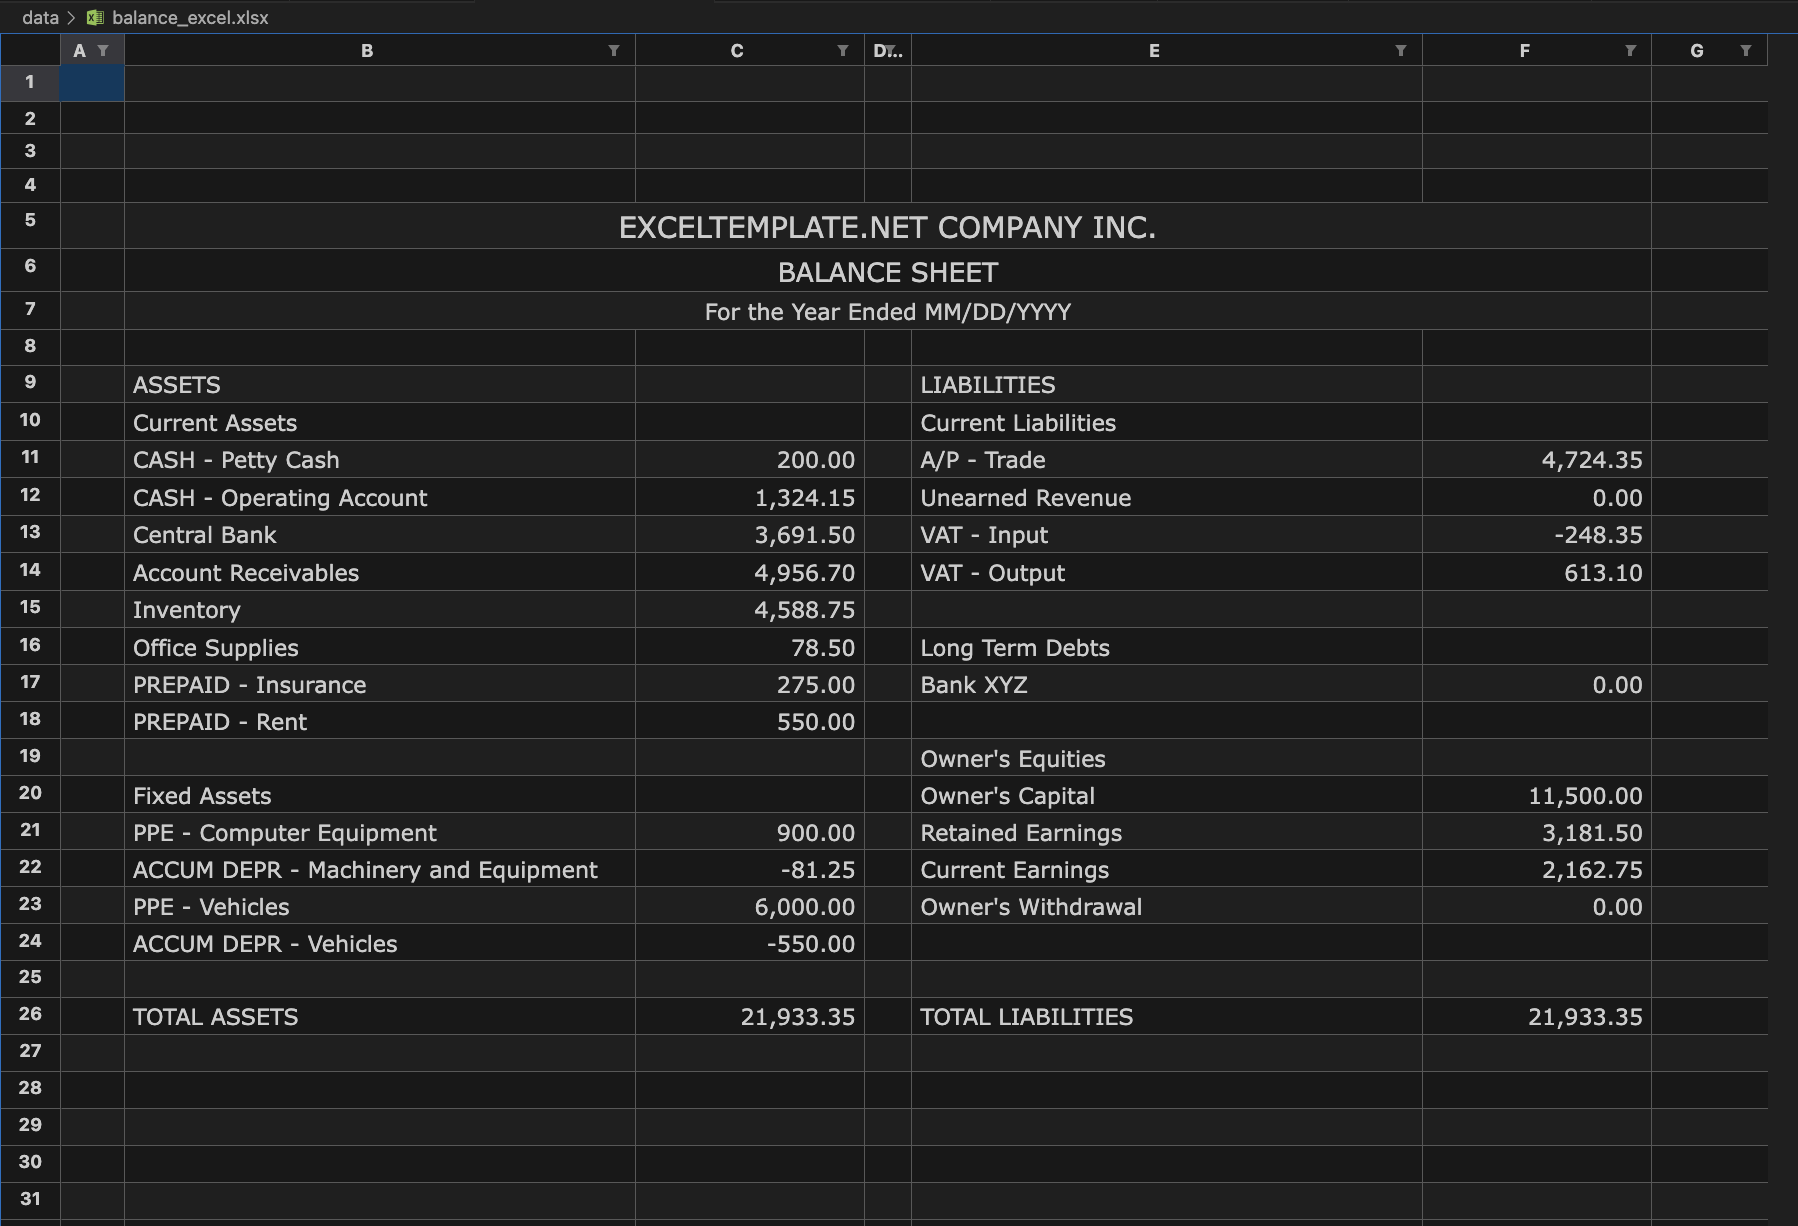

# 1. Set Upstage DocParse

Upstage DocParse converts any document into HTML format and provides text and markdown output formats for greater flexibility.

To demonstrate how DocParse converts a document, we will use HTML as the output format.

In [66]:
api_key = "UPSTAGE_API_KEY"
filename = "balance_excel.xlsx"


url = "https://api.upstage.ai/v1/document-ai/document-parse"
headers = {"Authorization": f"Bearer {api_key}"}
files = {"document": open(filename, "rb")}
data = {
    "ocr": "auto",
    "output_formats": "['html']"
}

In [67]:
import requests
response = requests.post(
    url,
    headers=headers,
    files=files,
    data=data
)

In [69]:
import json
decoded_content = response.content.decode('utf-8')
parsed_content = json.loads(decoded_content)

html_content = parsed_content['content']['html']
output_filename = "balance_excel.html"

In [70]:
from IPython.display import HTML

display(HTML(html_content))

,,LIABILITIES,
Current Assets,,Current Liabilities,
CASH - Petty Cash,200.00,A/P - Trade,"4,724.35"
CASH - Operating Account,"1,324.15",Unearned Revenue,0.00
Central Bank,"3,691.50",VAT - Input,(248.35)
Account Receivables,"4,956.70",VAT - Output,613.10
Inventory,"4,588.75",,
Office Supplies,78.50,Long Term Debts,
PREPAID - Insurance,275.00,Bank XYZ,0.00
PREPAID - Rent,550.00,,
,,Owner's Equities,


# 2. Setting Up Upstage Embedding Model with LlamaIndex

In [ ]:
pip install llama-index

In [ ]:
pip install llama-index-embeddings-upstage

Initialize the Upstage embedding model:



In [71]:
from llama_index.embeddings.upstage import UpstageEmbedding

embeddings = UpstageEmbedding(
    api_key="UPSTAGE_API_KEY",
    model="solar-embedding-1-large"
)


# 3. Creating a Vector Store with LlamaIndex

In [72]:
from llama_index.core import VectorStoreIndex, Document
from llama_index.core import Settings

# Create a Document object
document = Document(text=html_content)

Settings.embed_model = embeddings

# Create the index using the document
index = VectorStoreIndex.from_documents([document])

# 4. Querying the Document using Upstage Solar

Now that the document is embedded and stored, we can query the index using Upstage Solar to extract specific pieces of information orginally from the Excel Spread Sheet


In [ ]:
%pip install llama-index-llms-upstage==0.1.0

In [73]:
from llama_index.llms.openai import OpenAI
from llama_index.core import Settings

from llama_index.llms.upstage import Upstage
from llama_index.core.llms import ChatMessage

llm = Upstage(api_key="UPSTAGE_API_KEY")
Settings.llm = llm

# Now you can use the index to query
query_engine = index.as_query_engine()

# 5. Example Queries

Here are a few example queries and their responses:

In [74]:
# Example 1
response = query_engine.query("What are the assets?")
print(response)

The assets listed in the context information are:

1. Cash - Petty Cash
2. Cash - Operating Account
3. Central Bank
4. Account Receivables
5. Inventory
6. Office Supplies
7. Prepaid - Insurance
8. Prepaid - Rent
9. Fixed Assets
10. PPE - Computer Equipment
11. Accum Depr - Machinery and Equipment
12. PPE - Vehicles
13. Accum Depr - Vehicles

These assets are listed under the "ASSETS" category in the provided balance sheet.


In [64]:
# Example 2
response = query_engine.query("What is the total amount of assets?")
print(response)

The total amount of assets is $21,933.35.


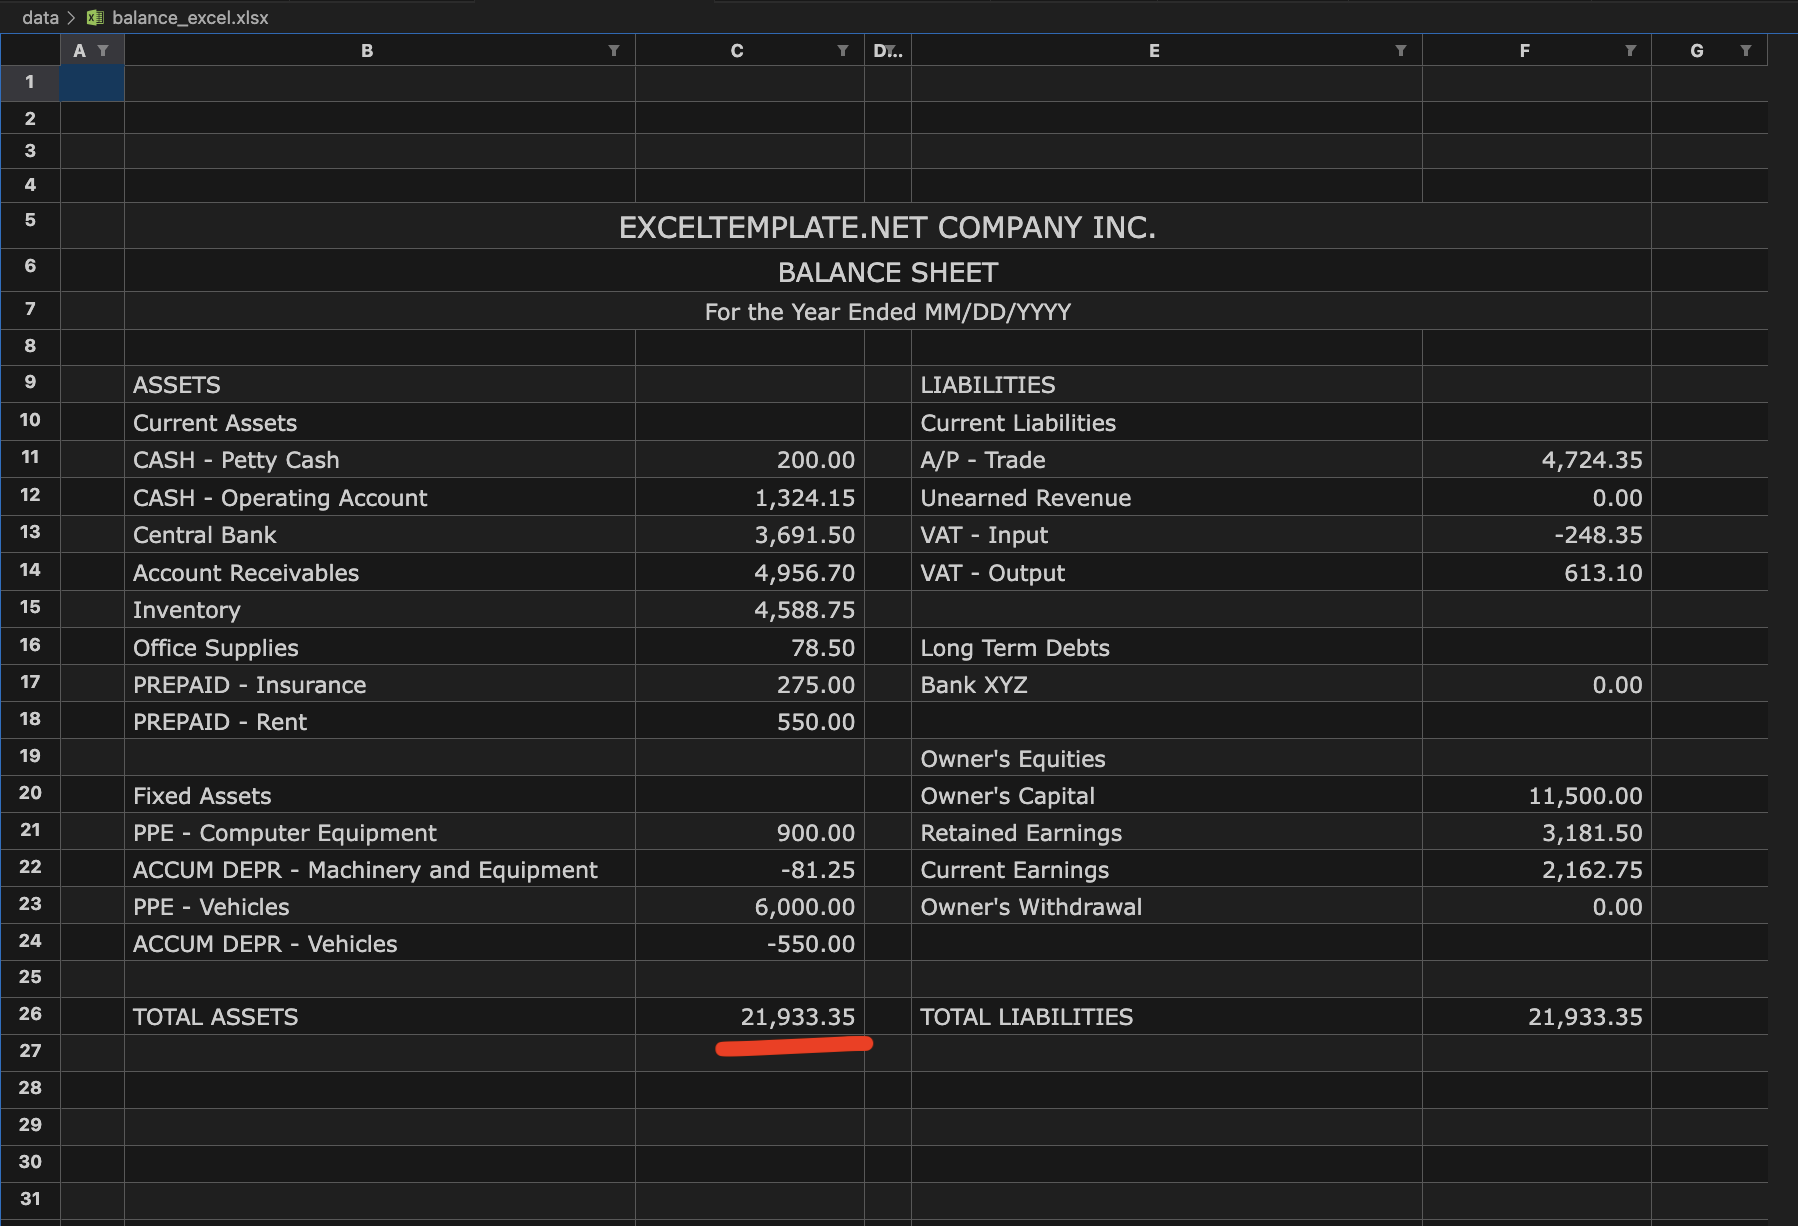

In [56]:
# Example 3
response = query_engine.query("What are the prepaid expenses?")
print(response)


The prepaid expenses are PREPAID - Insurance and PREPAID - Rent.


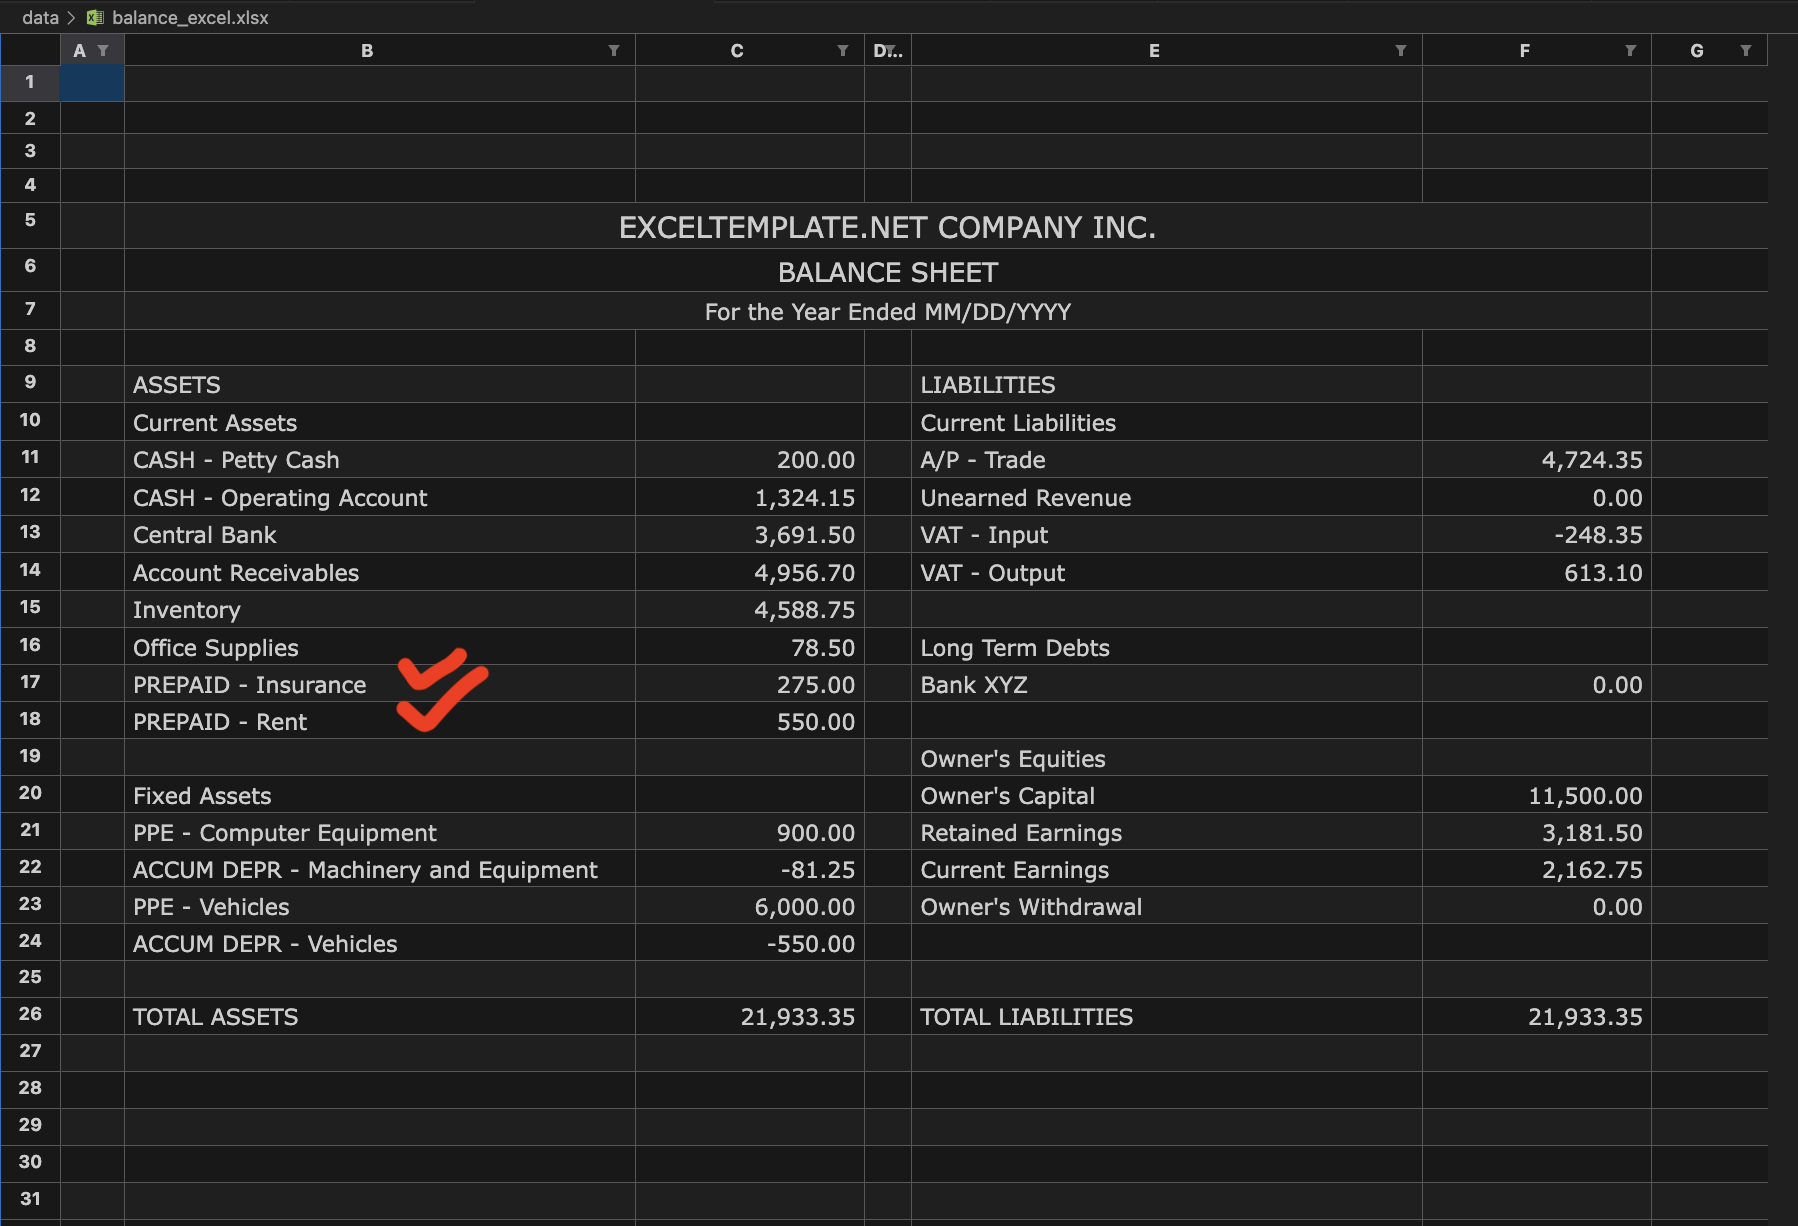

In [57]:
# Example 4
response = query_engine.query("How much cash is in the operating account?")
print(response)


The cash in the operating account is $1,324.15.


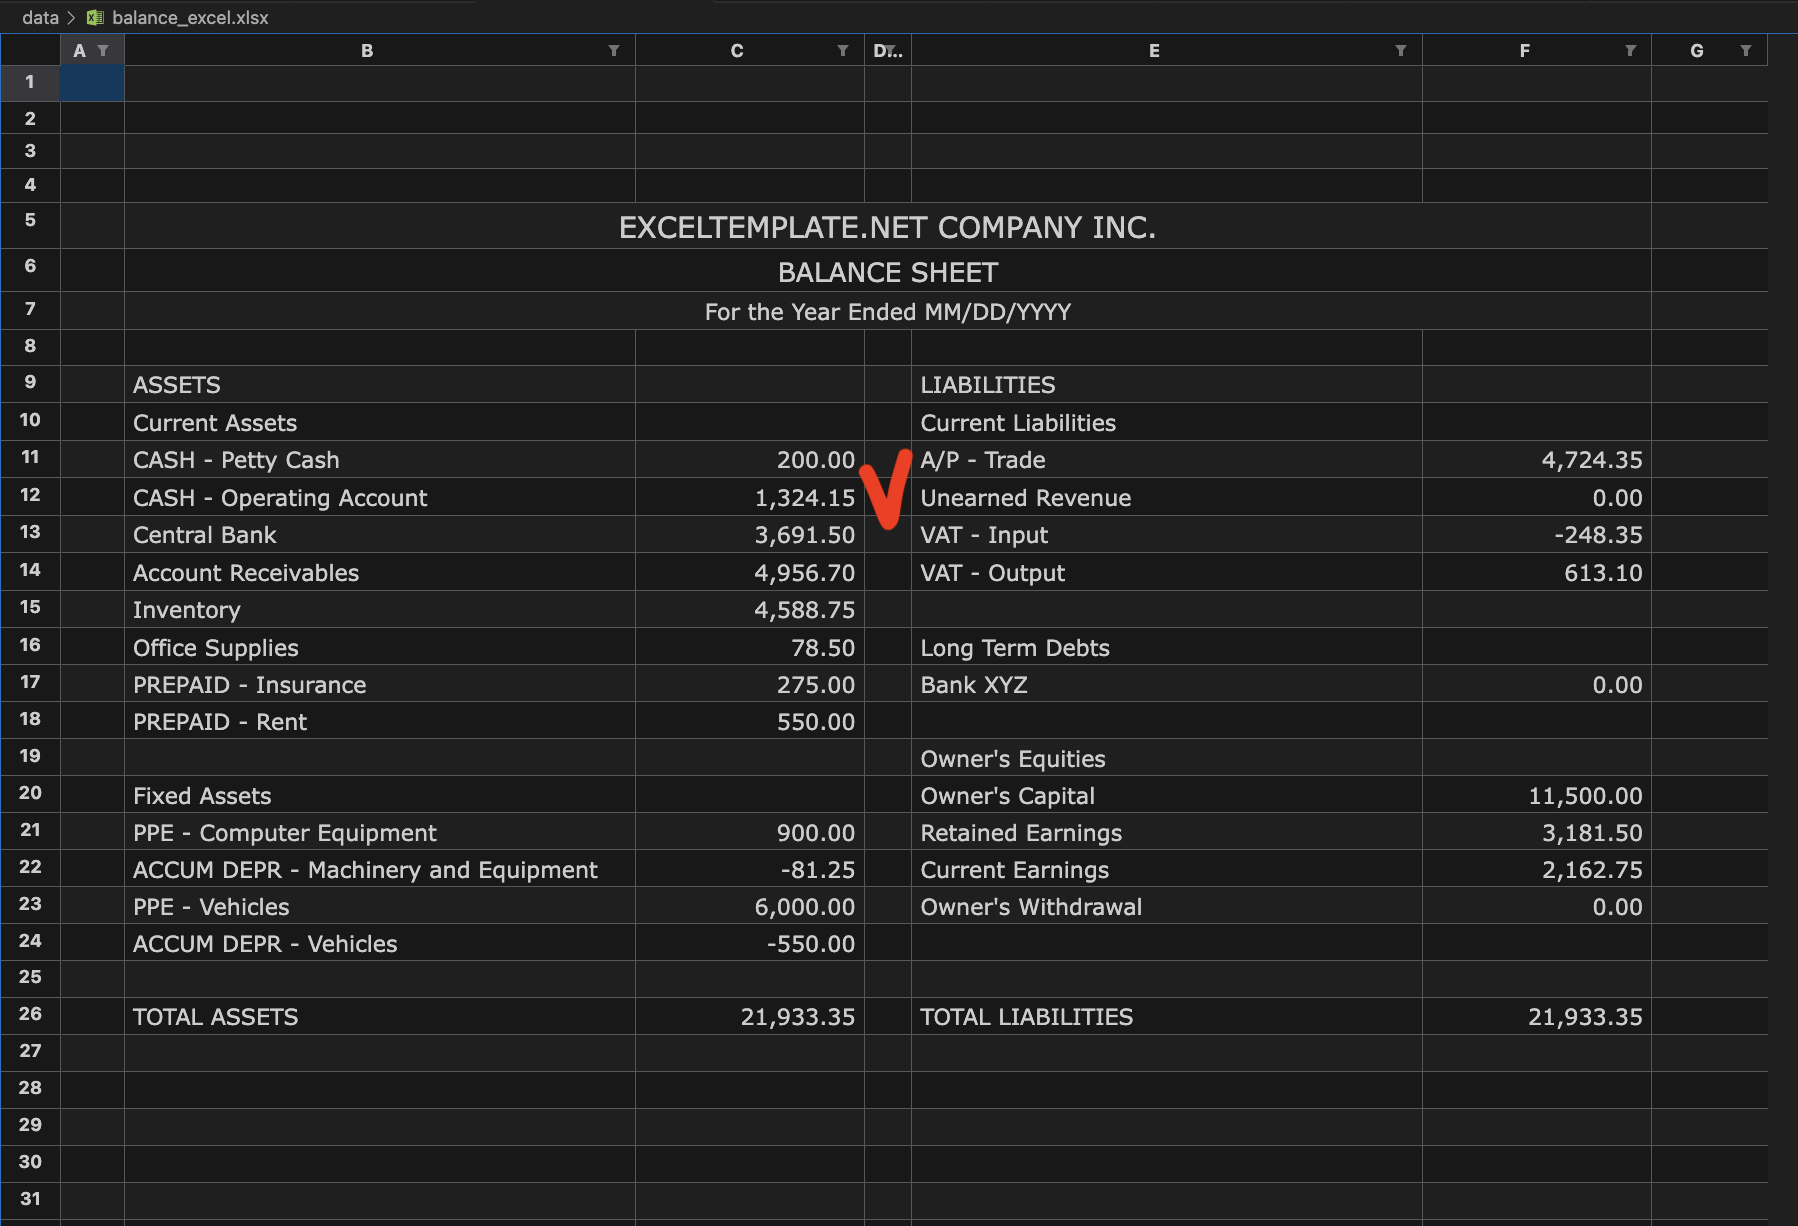

In [79]:
# Example 5
response = query_engine.query("What is the value for PPE?")
print(response)


The value for PPE (Property, Plant, and Equipment) is $6,900.00. This is calculated by adding the values of "PPE - Computer Equipment" ($900.00) and "PPE - Vehicles" ($6,000.00).


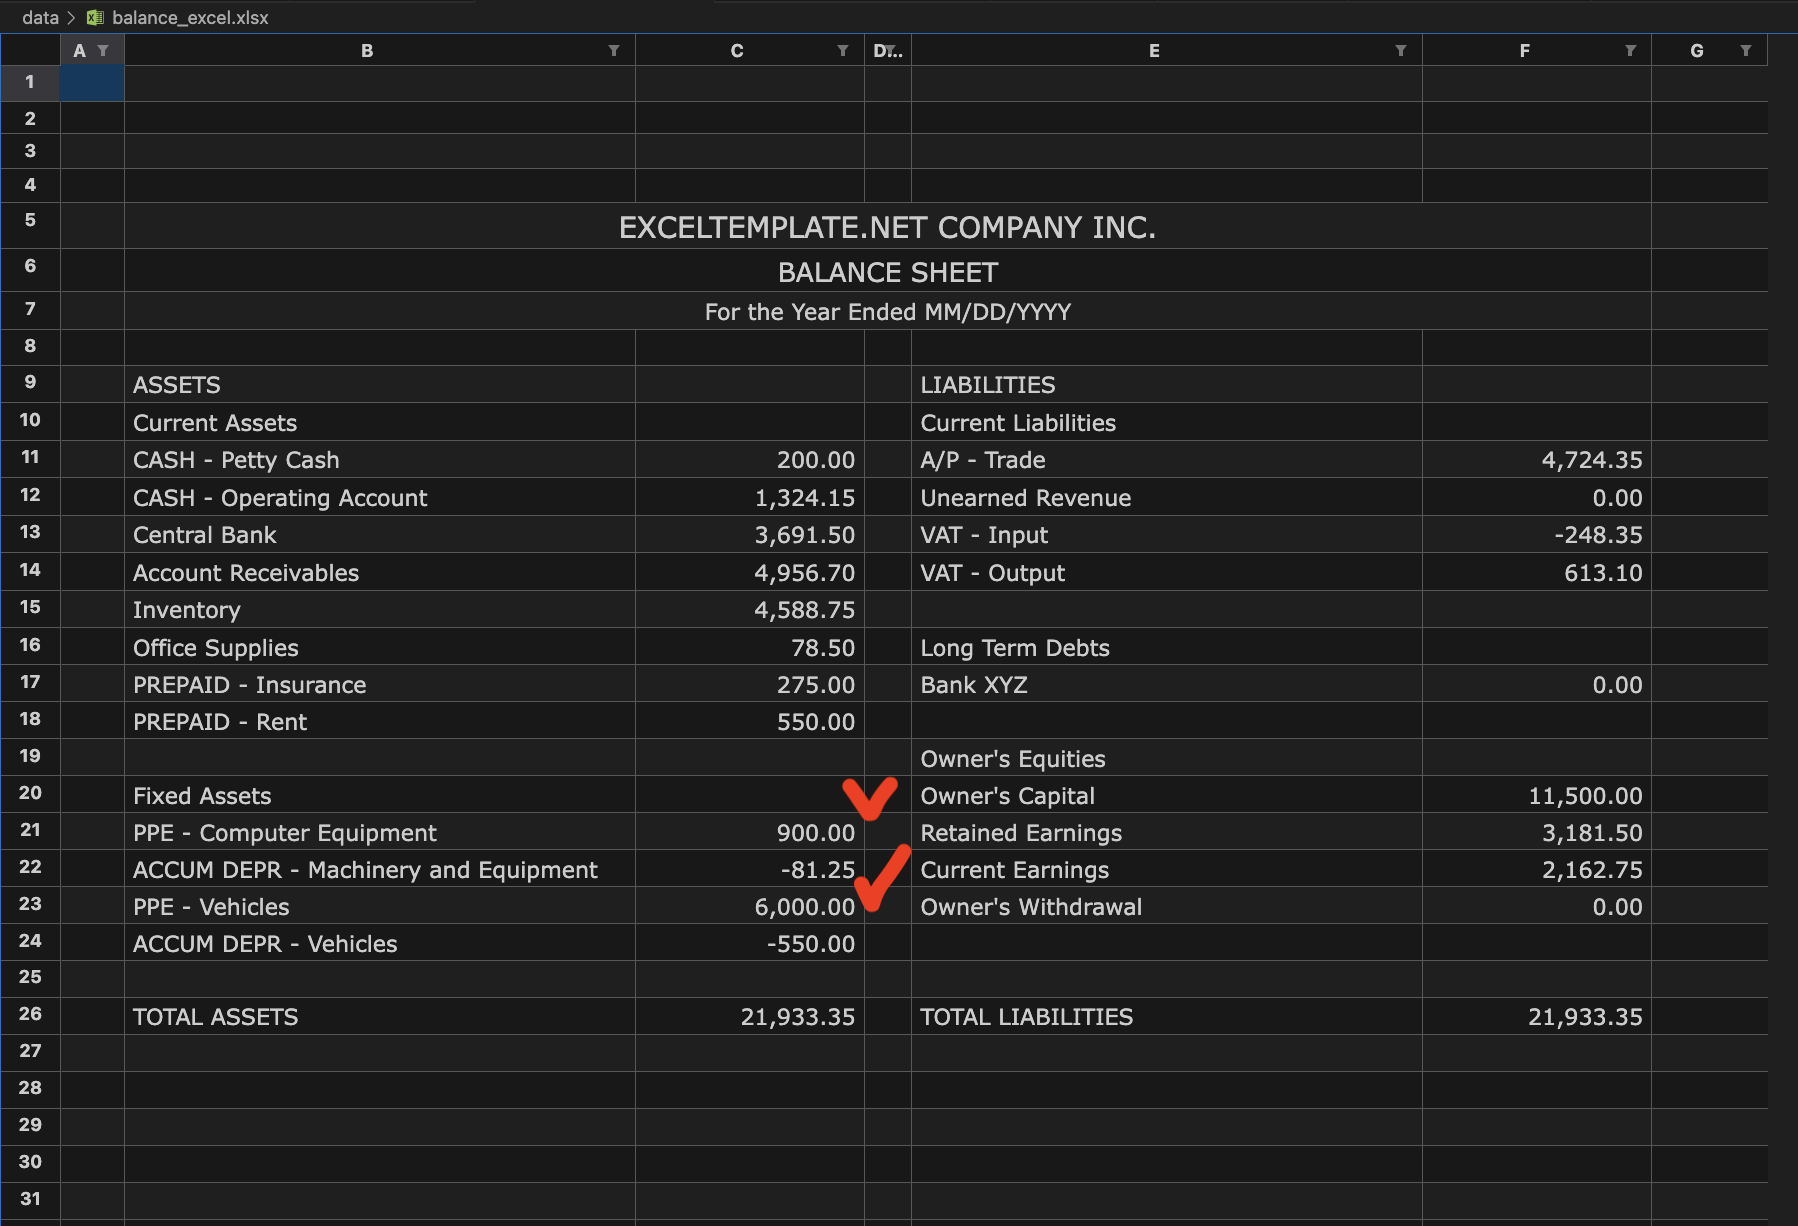